# Quantum Beers Game

Welcome everyone to the first event of the Meet Up group Quantum Barcelona. 

<img src="logo.png"
     alt="El Drac de Schrödinger"/>
     


In [131]:
## INPUTS
participant_names = [
                    ['Sergio', 'Eat sandwiches and drink beer'], 
                    ['Carmen', 'Learn Quantum Computing with other people'], 
                    ['Adrian', 'Improve my german skills'], 
                    ['Alfonso', 'Increase my knowledge of Quantum'],
                    ['Sergio', 'Eat sandwiches and drink beer'], 
                    ['Carmen', 'Learn Quantum Computing with other people'], 
                    ['Adrian', 'Improve my german skills'], 
                    ['Alfonso', 'Increase my knowledge of Quantum'],
                    ['Sergio', 'Eat sandwiches and drink beer'], 
                    ['Carmen', 'Learn Quantum Computing with other people'], 
                    ['Adrian', 'Improve my german skills'], 
                    ['Alfonso', 'Increase my knowledge of Quantum'],
                    ['Sergio', 'Eat sandwiches and drink beer'], 
                    ['Carmen', 'Learn Quantum Computing with other people'], 
                    ['Adrian', 'Improve my german skills'], 
                    ['Alfonso', 'Increase my knowledge of Quantum'],
                    ['Sergio', 'Eat sandwiches and drink beer'], 
                    ['Carmen', 'Learn Quantum Computing with other people'], 
                    ['Adrian', 'Improve my german skills'], 
                    ['Alfonso', 'Increase my knowledge of Quantum'],
                    ['Sergio', 'Eat sandwiches and drink beer'], 
                    ['Carmen', 'Learn Quantum Computing with other people'], 
                    ['Adrian', 'Improve my german skills'], 
                    ['Alfonso', 'Increase my knowledge of Quantum'],
                    ['Sergio', 'Eat sandwiches and drink beer'], 
                    ['Carmen', 'Learn Quantum Computing with other people'], 
                    ['Adrian', 'Improve my german skills'], 
                    ['Alfonso', 'Increase my knowledge of Quantum'],
                    ['Sergio', 'Eat sandwiches and drink beer'], 
                    ['Carmen', 'Learn Quantum Computing with other people'], 
                    ['Adrian', 'Improve my german skills'], 
                    ['Alfonso', 'Increase my knowledge of Quantum'],    
                    ]

In [62]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import execute, Aer, IBMQ
from qiskit.tools.visualization import plot_histogram
from qiskit.providers.aer.noise import NoiseModel, thermal_relaxation_error

provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-09-27 16:47:07,547: Credentials are already in use. The existing account in the session will be replaced.


In [157]:
# Create the qubits needed dynamically based on the final attendees, and generate the participants list in a way that our program understands it
len(participant_names[0])
qubits = len(bin(len(participant_names)-1)[2:])
binary_length = '{0:0'+str(qubits)+'b}'

participants = {}
for idx, participant in enumerate(participant_names):
    #print(binary_length.format(idx))
    participants[str(binary_length.format(idx))] = participant
    
participants


{'00000': ['Sergio', 'Eat sandwiches and drink beer'],
 '00001': ['Carmen', 'Learn Quantum Computing with other people'],
 '00010': ['Adrian', 'Improve my german skills'],
 '00011': ['Alfonso', 'Increase my knowledge of Quantum'],
 '00100': ['Sergio', 'Eat sandwiches and drink beer'],
 '00101': ['Carmen', 'Learn Quantum Computing with other people'],
 '00110': ['Adrian', 'Improve my german skills'],
 '00111': ['Alfonso', 'Increase my knowledge of Quantum'],
 '01000': ['Sergio', 'Eat sandwiches and drink beer'],
 '01001': ['Carmen', 'Learn Quantum Computing with other people'],
 '01010': ['Adrian', 'Improve my german skills'],
 '01011': ['Alfonso', 'Increase my knowledge of Quantum'],
 '01100': ['Sergio', 'Eat sandwiches and drink beer'],
 '01101': ['Carmen', 'Learn Quantum Computing with other people'],
 '01110': ['Adrian', 'Improve my german skills'],
 '01111': ['Alfonso', 'Increase my knowledge of Quantum'],
 '10000': ['Sergio', 'Eat sandwiches and drink beer'],
 '10001': ['Carmen', 

In [158]:
# Generate the opinion array with a very simple check. If you come to learn, you are in! :D
feed_keywords = ['knowledge', 'learn', 'learning', 'discover']
opinion = []

for participant in participants:
    num = 0
    for i in feed_keywords:
        num += participants[participant][1].lower().count(i.lower())

    if(num > 0):
        opinion.append(0)
    else:
        opinion.append(1)
        
print(opinion)


[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]


In [159]:
def add_oracle(circuit, qubits, number, qr_opinion):
    ctrls = np.binary_repr(number, width=qubits)
    for i, c in enumerate(ctrls):
        if c == '1':
            circuit.x(qubits - i - 1)
    
    circuit.mct(list(range(qubits)), qr_opinion[0])
            
    for i, c in enumerate(ctrls):
        if c == '1':
            circuit.x(qubits - i - 1)
    

In [160]:
def circuit(C, qubits, opinion, qr_opinion):
    for q in range(qubits):
        C.h(q)
    for i, o in enumerate(opinion):
        if o == 1:
            add_oracle(C, qubits, i, qr_opinion)
    C.barrier()
            
def circuit_inverse(C, qubits, opinion, qr_opinion):
    opinion.reverse()
    for i, o in enumerate(opinion):
        if o == 1:
            add_oracle(C, qubits, 2**qubits - 1 - i, qr_opinion)
    for q in range(qubits):
        C.h(q)
    opinion.reverse()
    C.barrier()
            
def oracle(C, qr_opinion):
    C.z(qr_opinion)
    C.barrier()
    
def diffusion(C, qubits, qr_opinion):
    C.h(qr_opinion)
    C.mct(list(range(qubits)), qr_opinion[0])
    C.h(qr_opinion)
    C.barrier()

In [161]:
def create_circuit(qubits, iterations, opinion, beers=True):
    C = QuantumCircuit()

    qr_people = QuantumRegister(qubits,'people')
    cr_people = ClassicalRegister(qubits, 'c_people')
    C.add_register(qr_people)
    C.add_register(cr_people)

    qr_opinion = QuantumRegister(1, 'opinion')
    cr_opinion = ClassicalRegister(1, 'c_opinion')
    C.add_register(qr_opinion)
    C.add_register(cr_opinion)

    qr_beer = QuantumRegister(1, 'beer')
    cr_beer = ClassicalRegister(1, 'c_beer')
    C.add_register(qr_beer)
    C.add_register(cr_beer)
    
    
    if beers:
        C.h(qr_beer)
        C.barrier()
        
    circuit(C, qubits, opinion, qr_opinion)
    
    for i in range(iterations):
        oracle(C, qr_opinion)
        circuit_inverse(C, qubits, opinion, qr_opinion)
        diffusion(C, qubits, qr_opinion)
        circuit(C, qubits, opinion, qr_opinion)
        
    if beers:
        C.barrier()
        C.h(qr_beer)
        
    for i in range(qubits + 2):
        C.measure(i,i)
        
    return C

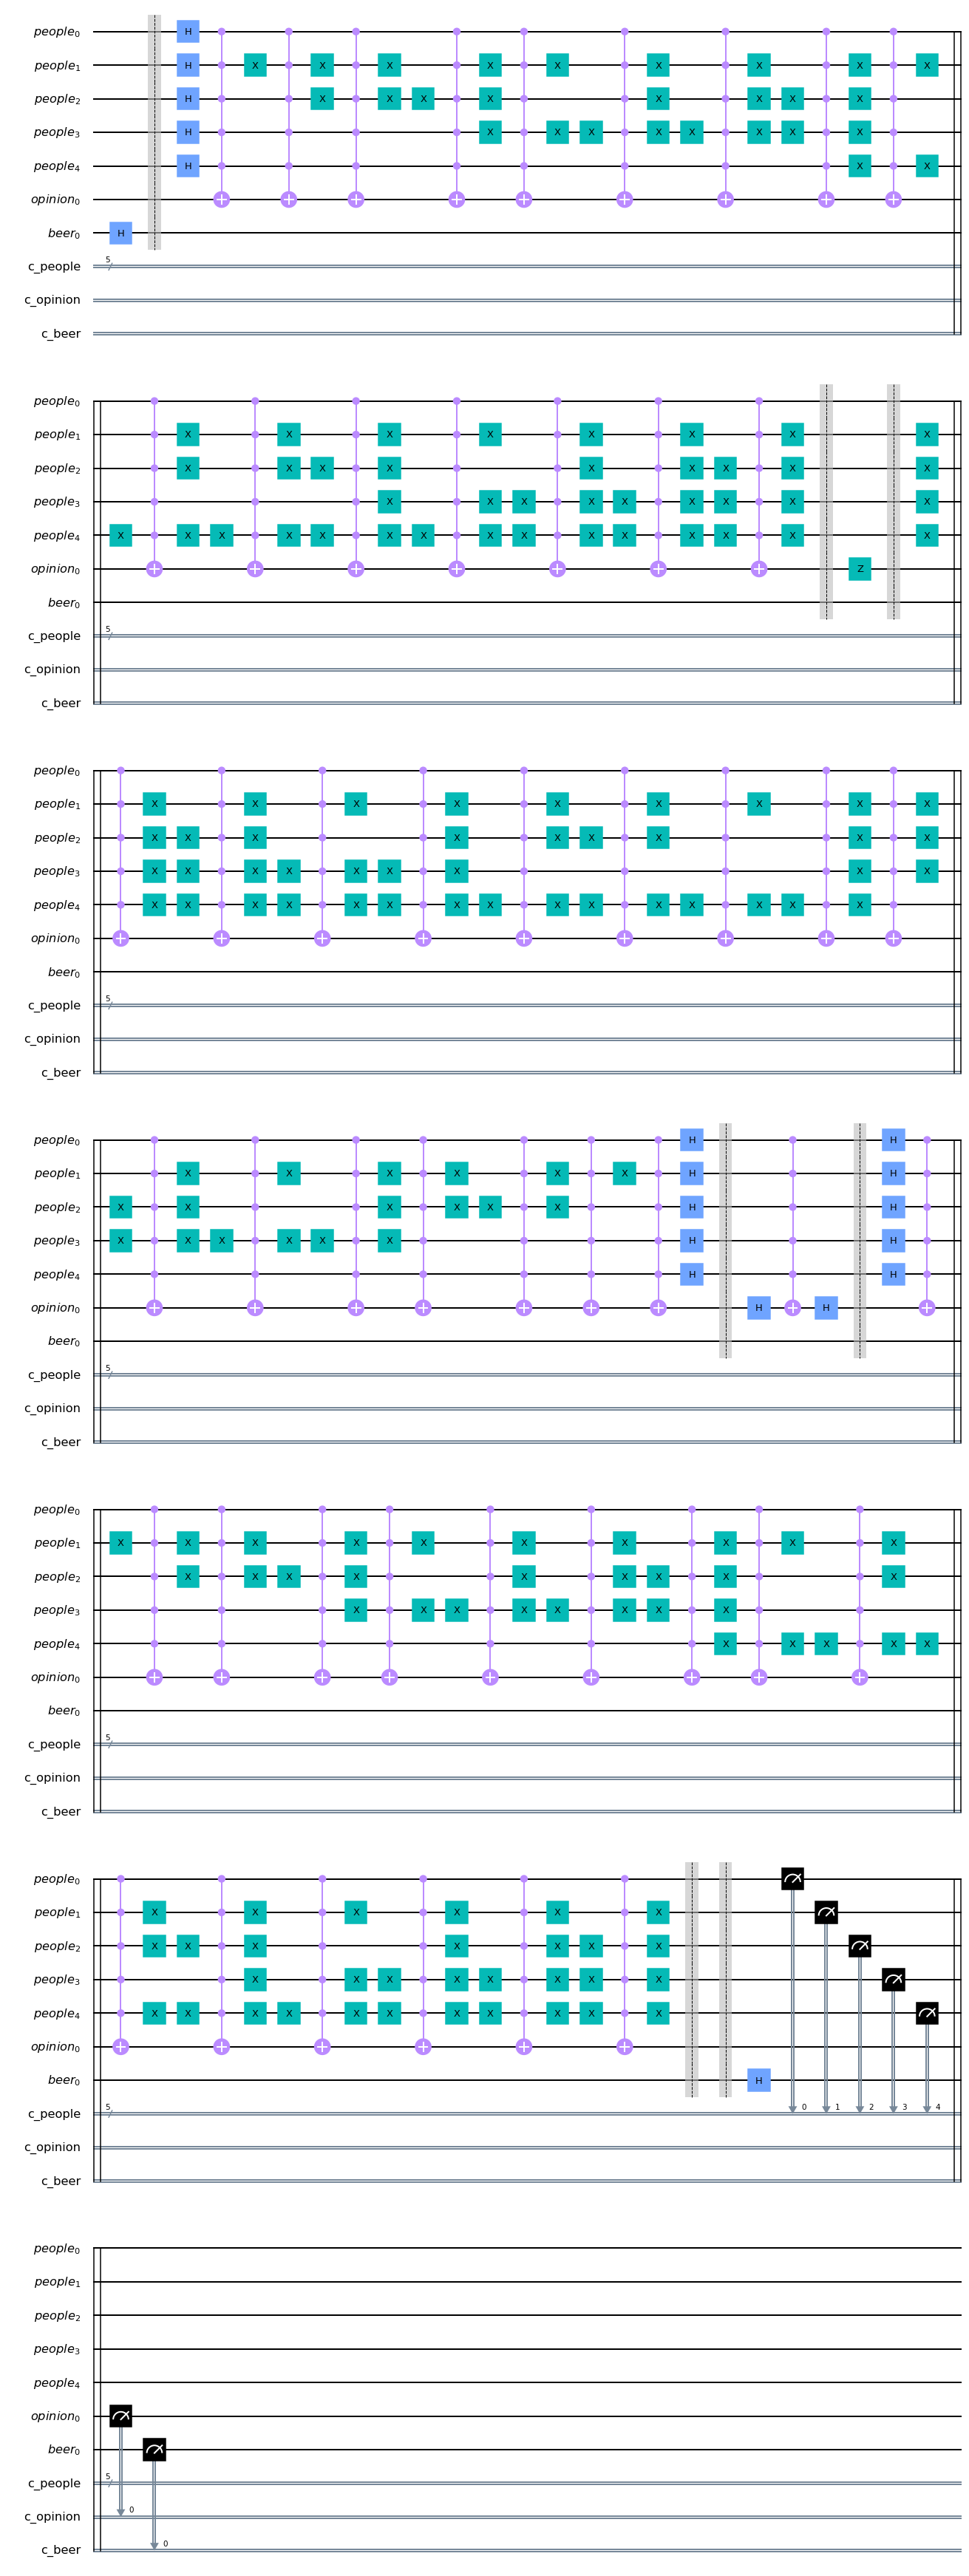

In [162]:
repetitions = 1
C = create_circuit(qubits, repetitions, opinion)

C.draw('mpl')

In [163]:
noisy_backend = provider.get_backend('ibmq_santiago')
noise_model = NoiseModel.from_backend(noisy_backend)
T1 = 0.01
T2 = 0.02
error = 0.01
thermal_error = thermal_relaxation_error(T1, T2, error)
noise_model.add_quantum_error(thermal_error, "h", [qubits+1])

{'0 0 00000': 109, '0 0 10000': 108, '0 0 10001': 1, '0 0 10010': 117, '0 0 10011': 2, '0 0 10100': 125, '0 0 10110': 99, '0 0 10111': 2, '0 0 11000': 128, '0 0 11001': 1, '0 0 11010': 97, '0 0 11011': 1, '0 0 11100': 102, '0 0 11101': 3, '0 0 11110': 110, '0 0 00010': 113, '0 1 00000': 5, '0 1 00001': 119, '0 1 00011': 123, '0 1 00101': 119, '0 1 00110': 1, '0 1 00111': 122, '0 1 01000': 3, '0 1 01001': 115, '0 1 01010': 2, '0 1 01011': 114, '0 1 01100': 2, '0 1 01101': 116, '0 1 01110': 3, '0 1 01111': 111, '0 1 10001': 133, '0 1 10011': 109, '0 1 10100': 1, '0 1 10101': 110, '0 1 10110': 5, '0 1 10111': 123, '0 1 11000': 1, '0 1 11001': 122, '0 1 11010': 1, '0 1 11011': 123, '0 1 11100': 4, '0 1 11101': 106, '0 1 11110': 1, '0 1 11111': 107, '0 0 00100': 118, '1 0 00000': 6, '1 0 00010': 10, '1 0 00100': 10, '1 0 00110': 7, '1 0 01000': 14, '1 0 01010': 12, '1 0 01100': 11, '1 0 01110': 8, '0 0 00101': 1, '1 0 10000': 13, '1 0 10010': 10, '1 0 10100': 10, '1 0 10110': 11, '1 0 11000

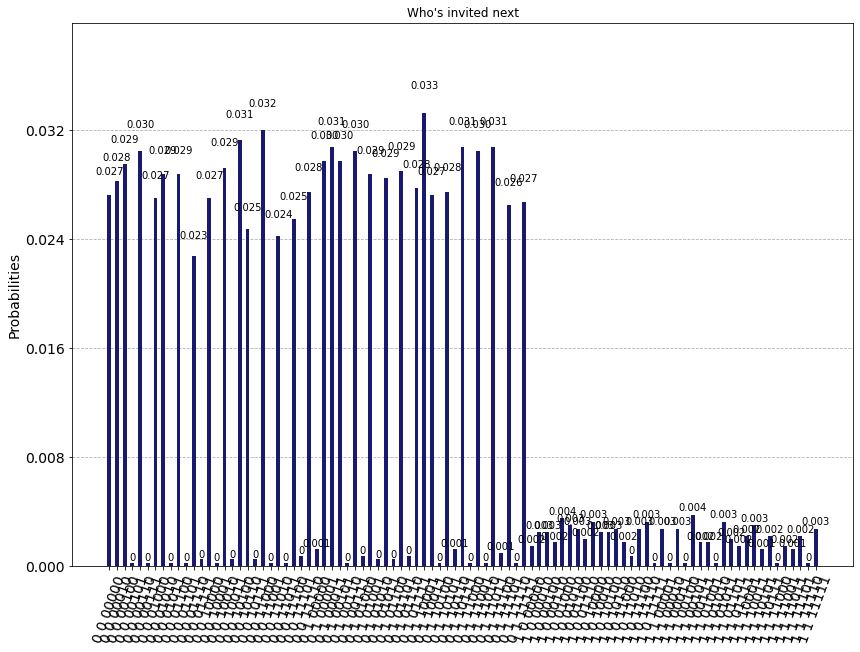

In [167]:
simulator = Aer.get_backend('qasm_simulator') 
shots = 4000
job_noisy = execute(C, simulator, shots=shots, noise_model=noise_model)
result_noisy = job_noisy.result()
counts_noisy = result_noisy.get_counts(C)
print(counts_noisy); # print the results of the runs
plot_histogram(counts_noisy, figsize=(25, 15), color='midnightblue', title="Who's invited next") # Visualise the results

In [165]:
noise_model.to_dict

<bound method NoiseModel.to_dict of NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'u2', 'u3']
  Instructions with noise: ['u2', 'h', 'u3', 'id', 'measure', 'cx']
  Qubits with noise: [0, 1, 2, 3, 4, 6]
  Specific qubit errors: [('id', [0]), ('id', [1]), ('id', [2]), ('id', [3]), ('id', [4]), ('u2', [0]), ('u2', [1]), ('u2', [2]), ('u2', [3]), ('u2', [4]), ('u3', [0]), ('u3', [1]), ('u3', [2]), ('u3', [3]), ('u3', [4]), ('cx', [0, 1]), ('cx', [1, 0]), ('cx', [1, 2]), ('cx', [2, 1]), ('cx', [2, 3]), ('cx', [3, 2]), ('cx', [3, 4]), ('cx', [4, 3]), ('h', [6]), ('measure', [0]), ('measure', [1]), ('measure', [2]), ('measure', [3]), ('measure', [4])]>

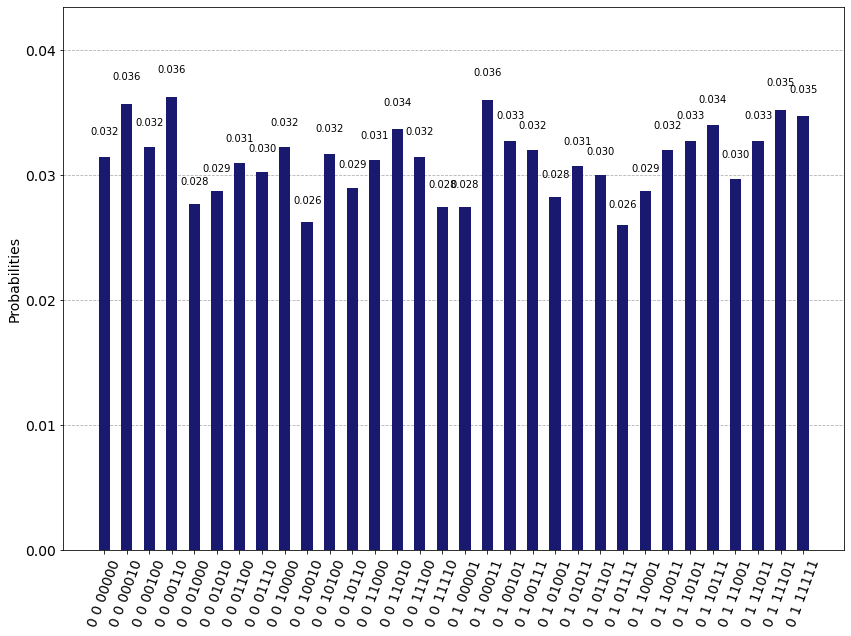

In [171]:
job_noiseless = execute(C, simulator, shots=shots)
result_noiseless = job_noiseless.result()
counts_noiseless = result_noiseless.get_counts(C)
plot_histogram(counts_noiseless, figsize=(14,10), color="midnightblue")

In [173]:
for c in counts_noisy:
    result = c.split()
    if(result[1] == '1' and counts_noisy[c] / shots > 0.2):
        print(participants[result[2]][0], "you are awesome! You are invited to the next one!")
    if(result[0] == '1' and counts_noisy[c] / shots >= 0.02):
        print(participants[result[2]][0],", you also have a beer!")